import dependencies

In [1]:
import tensorflow as tf
tf.get_logger().setLevel('INFO')
from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

2022-09-29 09:08:24.543321: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


generate dataset

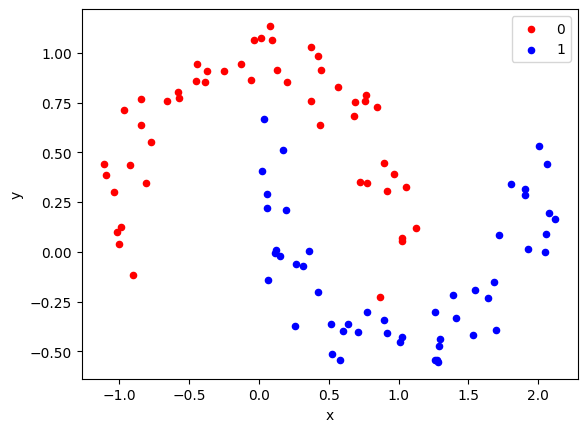

In [2]:
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.1)

# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

# split train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 123, stratify = y)

create the model

In [3]:
# model with 2+1 neurons
model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Dense(1, input_dim=2, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# make with 2+2+1 neurons
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Dense(2, input_dim=2, activation='relu'))
model2.add(tf.keras.layers.Dense(2, activation='relu'))
model2.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# model with 10+10+1 neurons
model3 = tf.keras.models.Sequential()
model3.add(tf.keras.layers.Dense(10, input_dim=2, activation='relu'))
model3.add(tf.keras.layers.Dense(10, activation='relu'))
model3.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

2022-09-29 09:08:26.752436: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-09-29 09:08:26.891264: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:02:00.0 name: NVIDIA TITAN Xp computeCapability: 6.1
coreClock: 1.582GHz coreCount: 30 deviceMemorySize: 11.91GiB deviceMemoryBandwidth: 510.07GiB/s
2022-09-29 09:08:26.892333: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:03:00.0 name: NVIDIA TITAN Xp computeCapability: 6.1
coreClock: 1.582GHz coreCount: 30 deviceMemorySize: 11.91GiB deviceMemoryBandwidth: 510.07GiB/s
2022-09-29 09:08:26.893370: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 2 with properties: 
pciBusID: 0000:82:00.0 name: NVIDIA TITAN Xp computeCapability: 6.1
coreClock: 1.582GHz coreCount: 30 deviceMemorySize: 11.91GiB deviceMemoryBandwidth: 510.07GiB/s
2022-09-29 09

train the model

In [4]:
# 2+1 neurons
print("Train phase")
history1 = model1.fit(X_train, y_train, epochs=100, validation_split = 0.2)
print("\nTest phase")
test1 = model1.evaluate(X_test, y_test)
print("Model accuracy = ", test1[1])

Train phase
Epoch 1/100


2022-09-29 09:08:29.154365: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-09-29 09:08:29.175646: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2999785000 Hz
2022-09-29 09:08:29.645213: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11


2/2 [==============================] - 1s 165ms/step - loss: 0.8096 - accuracy: 0.5469 - val_loss: 0.9278 - val_accuracy: 0.4375
Epoch 2/100
2/2 [==============================] - 0s 26ms/step - loss: 0.8085 - accuracy: 0.5469 - val_loss: 0.9268 - val_accuracy: 0.4375


2022-09-29 09:08:29.913476: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


Epoch 3/100
2/2 [==============================] - 0s 23ms/step - loss: 0.8075 - accuracy: 0.5469 - val_loss: 0.9258 - val_accuracy: 0.4375
Epoch 4/100
2/2 [==============================] - 0s 21ms/step - loss: 0.8065 - accuracy: 0.5469 - val_loss: 0.9248 - val_accuracy: 0.4375
Epoch 5/100
2/2 [==============================] - 0s 21ms/step - loss: 0.8055 - accuracy: 0.5469 - val_loss: 0.9237 - val_accuracy: 0.4375
Epoch 6/100
2/2 [==============================] - 0s 21ms/step - loss: 0.8044 - accuracy: 0.5469 - val_loss: 0.9227 - val_accuracy: 0.4375
Epoch 7/100
2/2 [==============================] - 0s 21ms/step - loss: 0.8034 - accuracy: 0.5469 - val_loss: 0.9217 - val_accuracy: 0.4375
Epoch 8/100
2/2 [==============================] - 0s 21ms/step - loss: 0.8024 - accuracy: 0.5469 - val_loss: 0.9207 - val_accuracy: 0.4375
Epoch 9/100
2/2 [==============================] - 0s 21ms/step - loss: 0.8014 - accuracy: 0.5469 - val_loss: 0.9197 - val_accuracy: 0.4375
Epoch 10/100
2/2 [==

In [5]:
# 2+2+1 neurons
print("Train phase")
history2 = model2.fit(X_train, y_train, epochs=100, validation_split = 0.2)
print("\nTest phase")
test2 = model2.evaluate(X_test, y_test)
print("Model accuracy = ", test2[1])

Train phase
Epoch 1/100
2/2 [==============================] - 1s 149ms/step - loss: 0.6849 - accuracy: 0.5469 - val_loss: 0.6775 - val_accuracy: 0.5625
Epoch 2/100
2/2 [==============================] - 0s 24ms/step - loss: 0.6840 - accuracy: 0.5781 - val_loss: 0.6766 - val_accuracy: 0.8750
Epoch 3/100
2/2 [==============================] - 0s 24ms/step - loss: 0.6833 - accuracy: 0.7812 - val_loss: 0.6757 - val_accuracy: 0.8750
Epoch 4/100
2/2 [==============================] - 0s 23ms/step - loss: 0.6824 - accuracy: 0.7812 - val_loss: 0.6747 - val_accuracy: 0.8750
Epoch 5/100
2/2 [==============================] - 0s 23ms/step - loss: 0.6815 - accuracy: 0.7812 - val_loss: 0.6738 - val_accuracy: 0.8750
Epoch 6/100
2/2 [==============================] - 0s 25ms/step - loss: 0.6806 - accuracy: 0.7812 - val_loss: 0.6728 - val_accuracy: 0.8750
Epoch 7/100
2/2 [==============================] - 0s 23ms/step - loss: 0.6797 - accuracy: 0.7812 - val_loss: 0.6719 - val_accuracy: 0.8750
Epoch 8

In [6]:
# 10+10+1 neurons
print("Train phase")
history3 = model3.fit(X_train, y_train, epochs=100, validation_split = 0.2)
print("\nTest phase")
test3 = model3.evaluate(X_test, y_test)
print("Model accuracy = ", test3[1])

Train phase
Epoch 1/100
2/2 [==============================] - 1s 152ms/step - loss: 0.7647 - accuracy: 0.2344 - val_loss: 0.7522 - val_accuracy: 0.1250
Epoch 2/100
2/2 [==============================] - 0s 25ms/step - loss: 0.7596 - accuracy: 0.2344 - val_loss: 0.7476 - val_accuracy: 0.1250
Epoch 3/100
2/2 [==============================] - 0s 27ms/step - loss: 0.7544 - accuracy: 0.2500 - val_loss: 0.7432 - val_accuracy: 0.1250
Epoch 4/100
2/2 [==============================] - 0s 25ms/step - loss: 0.7496 - accuracy: 0.2500 - val_loss: 0.7390 - val_accuracy: 0.1250
Epoch 5/100
2/2 [==============================] - 0s 23ms/step - loss: 0.7446 - accuracy: 0.2500 - val_loss: 0.7349 - val_accuracy: 0.1250
Epoch 6/100
2/2 [==============================] - 0s 26ms/step - loss: 0.7400 - accuracy: 0.2500 - val_loss: 0.7307 - val_accuracy: 0.1250
Epoch 7/100
2/2 [==============================] - 0s 24ms/step - loss: 0.7354 - accuracy: 0.2188 - val_loss: 0.7267 - val_accuracy: 0.1875
Epoch 8

plot train loss and val loss

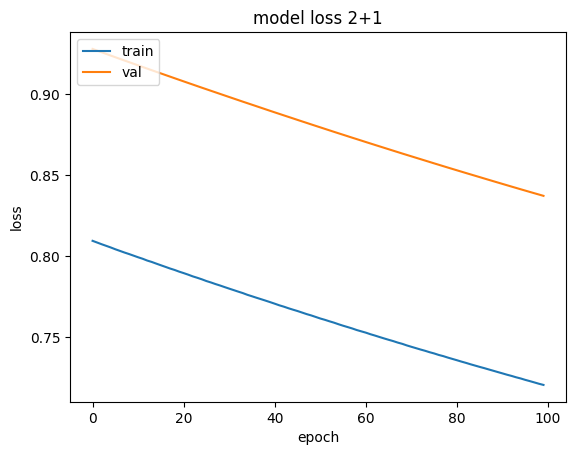

In [7]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss 2+1')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

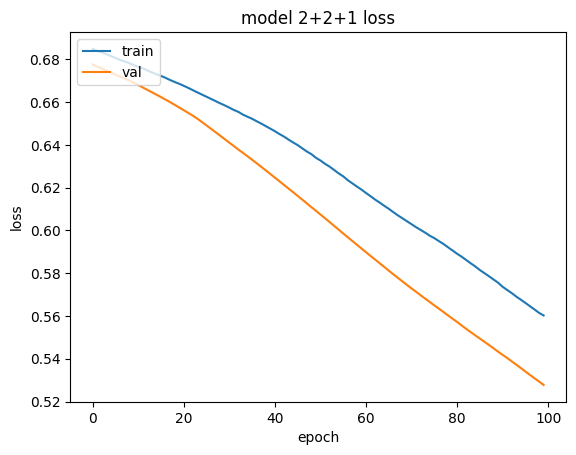

In [8]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model 2+2+1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

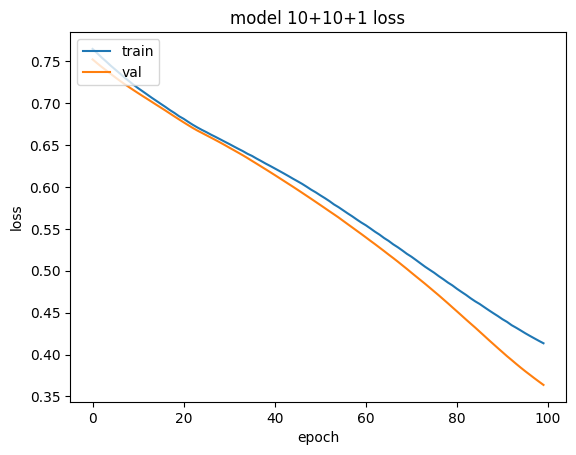

In [9]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model 10+10+1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plot test result

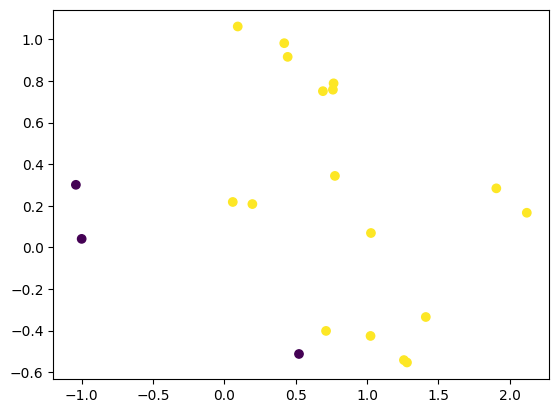

In [10]:
pred1 = model1.predict(X_test)
out1 = (pred1 >= 0.5).astype("int32")
pyplot.scatter(X_test[:, 0], X_test[:, 1], c=out1)

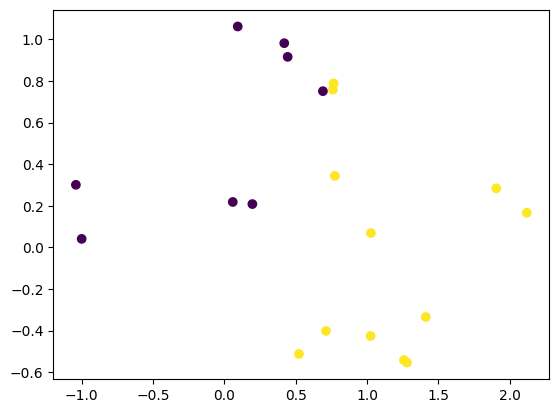

In [11]:
pred2 = model2.predict(X_test)
out2 = (pred2 >= 0.5).astype("int32")
pyplot.scatter(X_test[:, 0], X_test[:, 1], c=out2)

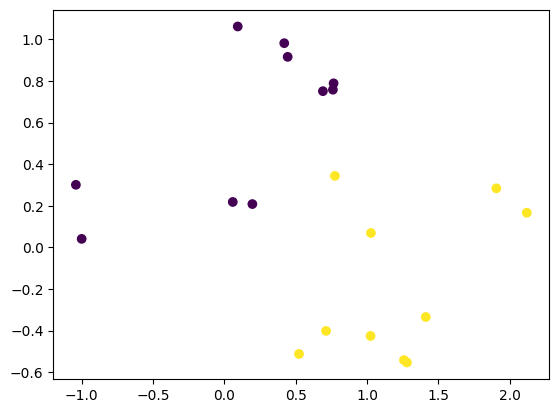

In [12]:
pred3 = model3.predict(X_test)
out3 = (pred3 >= 0.5).astype("int32")
pyplot.scatter(X_test[:, 0], X_test[:, 1], c=out3)